# FoodX Xtern Artificial Intelligence Work Assessment
#### By: Jason Chia

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading Datasets

In [2]:
df = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx', sheet_name=0)

In [3]:
menu = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx', sheet_name=1)

## Exploratory Data Analysis

In [4]:
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12.0,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14.0,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12.0,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11.0,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12.0,Indiana Corn on the Cob (brushed with garlic b...


In [5]:
menu.rename(columns={menu.columns[0]: "Item_Number"}, inplace=True)
menu

,Item_Number,Item,Price,Calories
0,0.0,Hoosier BBQ Pulled Pork Sandwich,8.0,400.0
1,1.0,Cornbread Hush Puppies,5.0,250.0
2,2.0,Breaded Pork Tenderloin Sandwich,9.0,550.0
3,3.0,Indiana Pork Chili,7.0,300.0
4,4.0,Fried Catfish Basket,10.0,600.0
5,5.0,Ultimate Grilled Cheese Sandwich (with bacon a...,6.0,450.0
6,6.0,Sweet Potato Fries,4.0,200.0
7,7.0,Indiana Corn on the Cob (brushed with garlic b...,3.0,150.0
8,8.0,Indiana Buffalo Chicken Tacos (3 tacos),9.0,400.0
9,9.0,Sugar Cream Pie,4.0,450.0


### Data Columns
Exploring each column in the main dataset shows each column is a categorical variable (except for the column Time which could be interpreted as a continuous integer variable) with no null values or extreme outliers. 

In [6]:
for col in df.columns:
    print(f"Unique values and number of occurrences for the column {col}:")
    print(df[col].value_counts())
    print("\n\n------------------------------------------------------------------------------\n")

Unique values and number of occurrences for the column Year:
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64


------------------------------------------------------------------------------

Unique values and number of occurrences for the column Major:
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64


--------------------------------------------------------------

### Menu Insights

By using values from the menu, the average and median calories and costs of each meal can be calculated.

In [7]:
menu_calories = {}
menu_cost = {}
for i in menu["Item_Number"]:
    menu_calories[menu["Item"][int(i)]] = menu["Calories"][int(i)]
    menu_cost[menu["Item"][int(i)]] = menu["Price"][int(i)]
calorie_df = df.replace(menu_calories)
cost_df = df.replace(menu_cost)
print(f"Average calorie of a meal: {calorie_df['Order'].mean()} calories")
print(f"Median calorie of a meal: {calorie_df['Order'].median()} calories")
print(f"Average cost of a meal: ${cost_df['Order'].mean():.2f}")
print(f"Median cost of a meal: ${cost_df['Order'].median():.2f}")

Average calorie of a meal: 374.0 calories
Median calorie of a meal: 400.0 calories
Average cost of a meal: $6.47
Median cost of a meal: $6.00


### Variable Relationships

After encoding all string categorical variables to numbers for easier manipulation, the relationships between different variables can be calculated and visualized.

In [8]:
#Encode all string columns to categorical numerical columns
for col in df.columns:
    if (df[col].dtype=="object"):
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])

In [9]:
df.head()

,Year,Major,University,Time,Order
0,1,16,3,12.0,2
1,2,5,0,14.0,7
2,2,5,1,12.0,6
3,1,3,3,11.0,2
4,2,4,1,12.0,5


[Text(0.5, 1.0, 'Dataframe Column Relationships')]

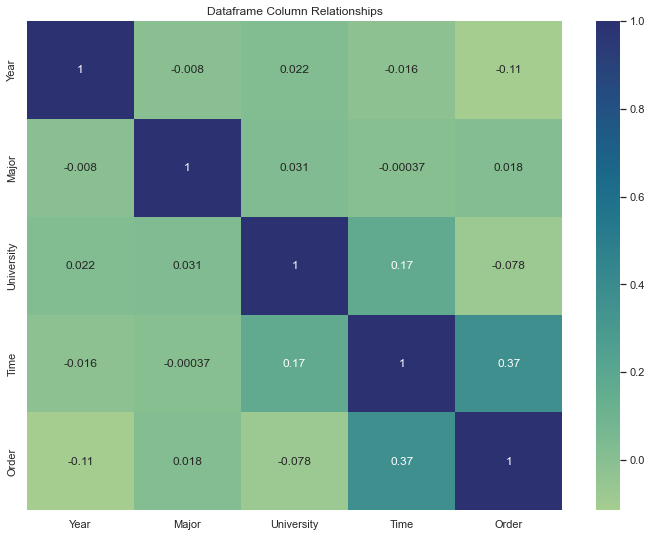

In [10]:
sns.set(rc={'figure.figsize':(12,9)})

sns.heatmap(df.corr(), annot=True, cmap="crest").set(title="Dataframe Column Relationships")

## Exploratory Data Analysis Findings

There seem to be mostly extremely **weak correlations** between variables with the notable exception of the slightly positive relation of time to the order. This indicates model prediction results will likely have **poor performance** due to weak correlations between all the variables and the target order variable.

On a positive note, there seem to be **no extreme outliers or missing variables** in the dataset of 5000 orders. And the average and median calorie and cost of each order can be easily calculated. In this data, everyone seemed to only order 1 item from the menu. The average calorie of a meal was 374 calories with the average cost at \\$6.47. The median calorie of a meal was 400 calories with the median cost being \\$6.00.

The average calorie and cost can be taken into consideration if trying to add a new item to the menu for deciding portion and price.

## Data Collection, Storage, and Bias Impacts

### Ethical Implications

There are a few major considerations for ethical implications relating to data collection, storage, and bias. This includes **privacy**, **informed consent/ability to freely opt out**, and **data usage**. 

Under the umbrella of **privacy** includes anonymization of information, and while the data does not contain names, it could be possible for others to gather information about subjects the subjects when giving their data did not want other parties to have. Thus, secure data storage with controlled access is essential in addition to the removal of general obvious personal identification information.

**Informed consent** and the ability to opt out are also essential and tied to data bias and collection. When collecting the data, purpose and usage must be clear, and there must be a truly free option to opt out without fear of any consequences. For example, only providing the 10% discount option to those who have contributed data could put greater pressure to those with lower incomes to provide their data. This could also bias your data towards lower income individuals. Furthermore, without a strong explanation to those with or without a technical background of the data purpose and usage, the data could also be biased towards those who understand data science less which could correlate with other variables which do impact order prediction.

**Data usage** is also of utmost importance to consider. Ethically using the data and not using the data to discriminate or turning around and selling people's data without their consent requires a few steps. It involves secure data collection and storage in line with what the data providers consented to. Furthermore, it means there is an obligation to analyze the any models arising from the data that existing data biases do not get passed onto the model and utilized to unfairly disriminate.

### Business Implications

Numerous implications exist for data collection, storage, and bias in business. This includes factors such as **cost**, **performance**, and **trust**.

**Cost** of data collection and storage is extremely important to consider in how to collect and store data. Data collection and storage is extremely important for model performance and data usage. Higher quality and amounts of data can oftentimes yield better results. However, this requires specialized persons to manage and collect data, along with hardware which tends to increase as the amount of data increases. 

**Performance** means things like resulting model performance off of the collected data. Bias resulting from a variety of factors including data collection methods is extremely important to consider for resulting model performance implications. Data bias can result in various unwanted results and biases in the resulting models which can impact the efficiency and accuracy of tasks designated to the models built and trained off of collected data.

**Trust** is extremely important in retaining and attracting customers. And trust is linked to data collection and storage because when the customer gives you data, it is entrusting you to responsibly manage the data. This includes the implicit requirement of keeping the data secure and only working within the parameters of their consent. Furthermore, trust is extended to the usage of the data, such as mitigating biases which get passed on from data to the model to not discriminate unfairly.

### Technical Implications

In addition to all the previous implications, technical details also exist for data collection, storage, and bias such as the methods to **collect data**, **store data**, and **address bias**.

**Data collection method** considerations for a business include the best method to have both representative and maximal collection of data from the target group (in this case customers). This could mean collecting data during all operating hours over an entire week or longer to ensure traits of all customer crowds is gathered. And to maximize responses, incentives could be added for those who do volunteer their data.

**Storing data** also has various aspects which must be considered. Some include hardware decisions such as where and how to store the data. In a remote server, or on-site, and how user access will be implemented. This could include locking the server room, and implementing role based permissions for accessing the data. Moreover, there are also technical implications such as encryption methods.

**Addressing data bias** has a plethora of technical details. Due to imperfect conditions, data biases, wanted or unwanted, are almost always captured. One major method of mitigating data bias is through having solid data collection methods (as previously mentioned). Additionally, further analysis of gathered data can help to reveal data biases to watch for, or to normalize with statistical methods. 

## Library Loading

In [11]:
import pickle
import torch.nn as nn
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.autograd import grad
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from torch.optim import Adam
import torch
import pandas as pd
from torch.utils.data import DataLoader,TensorDataset
import cupy as cp

## Data Preparation

1. Loading main data sheet from excel into a pandas dataframe.
2. Setting random seed for reproducibility.
3. Encoding categorical string variables to categorical numerical variables.
4. Shuffling data, separating the label column (Orders) and the rest of the data column, and splitting it into a 80% train 20% test split.
5. Loading data into tensors to gpu for gpu and a data loader for efficiency. 

In [12]:
#Setting device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [13]:
df = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx', sheet_name=0)

In [14]:
random.seed(99)

In [15]:
#Encode all string columns to categorical numerical columns
for col in df.columns:
    if (df[col].dtype=="object"):
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])

In [16]:
#Helper function for shuffling two sets of data the same way
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [17]:
def load_data(df, train_split, batch_size):
    #Separate label data and shuffle data
    X = df.values[:, :-1]
    X = X.astype('float32')
    Y = df.values[:, -1]
    Y = Y.astype('float32')
    Y = Y.reshape((len(Y), 1))
    X, Y = shuffle(X, Y)
    
    train_size = int(train_split * len (X))
    
    #Load data onto GPU
    train_X = torch.tensor(X[:train_size, :]).to(device)
    train_Y = torch.tensor(Y[:train_size, :]).to(device)
    test_X = torch.tensor(X[train_size:, :]).to(device)
    test_Y = torch.tensor(Y[train_size:, :]).to(device)

    trainingData = TensorDataset(train_X, train_Y)
    testData = TensorDataset(test_X, test_Y)

    
    train_dataloader = DataLoader(trainingData, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(testData, batch_size = batch_size, shuffle=False)
    
    return train_dataloader, test_dataloader

In [18]:
train_dataloader, test_dataloader = load_data(df, 0.8, 64)

## Model Training and Selection

Utilizing a neural network with PyTorch because it has been shown to perform well on similar multiclassification problems and can utilize gpu acceleration. This neural network utilizes kaiming uniform and xavier uniform layer weight initializers, Cross Entropy Loss, and an Adam optimizer. Layers are all linear with Rectified Linear Unit activation functions except the last layer which uses Softmax to predict a single class for this multiclassification task. Hidden layer sizes are the same as input because input is already a low size, and output size is the number of classes.

Various hyper parameter options are tested to find the best model. The model with the highest test set (hold out set) performance is then pickled.

Note: The option to use .predict(data) instead of the normal model(data).

In [19]:
#defining the model
class MLP(nn.Module):
    # define model layers
    def __init__(self, n_inputs, layers):
        super(MLP, self).__init__()
        if (layers >= 2):
            layer1 = nn.Linear(n_inputs, n_inputs)
            kaiming_uniform_(layer1.weight, nonlinearity='relu')
        if (layers >= 3):
            layer2 = nn.Linear(n_inputs, n_inputs)
            kaiming_uniform_(layer2.weight, nonlinearity='relu')
        if (layers >= 4):
            layer3 = nn.Linear(n_inputs, n_inputs)
            kaiming_uniform_(layer3.weight, nonlinearity='relu')
        out_layer = nn.Linear(n_inputs, 10)
        xavier_uniform_(out_layer.weight)
        if (layers == 1):
            self.main_ = nn.Sequential(out_layer, nn.Softmax(dim=1))
        elif (layers == 2):
            self.main_ = nn.Sequential(layer1, nn.ReLU(), out_layer, nn.Softmax(dim=1))
        elif (layers == 3):
            self.main_ = nn.Sequential(layer1, nn.ReLU(), layer2, nn.ReLU(), out_layer, nn.Softmax(dim=1))
        elif (layers == 4):
            self.main_ = nn.Sequential(layer1, nn.ReLU(), layer2, nn.ReLU(), layer3, nn.ReLU(), out_layer, nn.Softmax(dim=1))

    def forward(self, X):
        X = self.main_(X)
        return X
    
    def predict(self, X):
        X = self.main_(X)
        return X

# train the model
def train_model(train_DL, model, epochs, lr):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    for epoch in range(epochs):
        for batch_data, batch_labels in train_DL:
            # Forward pass
            outputs = model(batch_data)
            
            # Compute the loss
            loss = criterion(outputs, batch_labels.view(-1, ).long())

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

# evaluate the model accuracy
def evaluate_model(test_dl, model):
    model.eval()
    with torch.no_grad():
        predictions, actuals = list(), list()
        for i, (inputs, targets) in enumerate(test_dl):

            yhat = model(inputs)
            yhat = yhat.detach()
            actual = targets
            actual = actual.reshape((len(actual), 1))
            # round to class values
            yhat = torch.argmax(yhat, dim=1)
            # store
            predictions.append(yhat)
            actuals.append(actual)

        #Flatten
        predictions = torch.cat(predictions)
        actuals = torch.cat(actuals)
        predictions, actuals = cp.vstack(predictions), cp.vstack(actuals)
        acc = mean_accuracy(predictions, actuals)
        return acc

In [20]:
#Small Helper Functions
def model_size(data):
    return(len(data.columns) - 1)

def mean_accuracy(logits, y):
    return (abs(logits - y) < 1e-2).mean() 

In [21]:
#create a table to output the results nicely
def complete_table(avg_train_acc, avg_test_acc, epochs, lr, layers):
    rows = [['learning Rate', 'Hidden Layer Count', 'Epochs', 'Training Acc', 'Test Acc']]
    for n in range (0, 1):
        rows.append((str(lr), str(layers), \
     str(epochs), str(avg_train_acc), str(avg_test_acc)))
            
    def pretty_table(rows, column_count, column_spacing=4):
        aligned_columns = []
        for column in range(column_count):
            column_data = list(map(lambda row: row[column], rows))
            aligned_columns.append((max(map(len, column_data)) + column_spacing, column_data))
                    
        for row in range(len(rows)):
            aligned_row = map(lambda x: (x[0], x[1][row]), aligned_columns)
            yield ''.join(map(lambda x: x[1] + ' ' * (x[0] - len(x[1])), aligned_row))
                        
    for line in pretty_table(rows, 5):
        print (line)


In [22]:
#Hyperparameter testing
f_n_restarts = 10
max_test_acc = 0
best_model = MLP(4, 1)
for f_epoch in [400, 800, 1000]:
    for f_lr in [0.1, 0.01, 0.001]:
        for f_layers in [1, 2, 3, 4]:
            total_in_distribution_test_acc = 0
            avg_in_distribution_test_acc = 0
            total_test_acc = 0
            total_train_acc = 0
            # number of restarts
            for run in range(0, f_n_restarts):
                # define the network
                model = MLP(model_size(df), f_layers).to(device)
                #training the model
                train_model(train_dataloader, model, f_epoch, f_lr)

                #storing and averaging accuracy
                test_acc = evaluate_model(test_dataloader, model)
                total_test_acc += test_acc
                train_acc = evaluate_model(train_dataloader, model)
                total_train_acc += train_acc

                complete_table(train_acc, test_acc, f_epoch, f_lr, f_layers)

            #calculating average accuracy
            avg_train_acc = total_train_acc/f_n_restarts
            avg_test_acc = total_test_acc/f_n_restarts
            
            if (avg_test_acc > max_test_acc):
                best_model = model
                max_test_acc = test_acc

            #printing results
            print("Average:")
            complete_table(avg_train_acc, avg_test_acc, f_epoch, f_lr, f_layers)
            print("\n------------------------------------------------------------------------------\n")

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              1                     400       0.1455          0.141       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              1                     400       0.248           0.24        
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              1                     400       0.30075         0.284       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              1                     400       0.24775         0.262       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              1                     400       0.2155          0.205       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              1                     400       0.30825         0.306       
learning Rate    Hidden Layer Count    Epochs    Training Acc   

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             1                     400       0.40025         0.408       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             1                     400       0.42            0.415       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             1                     400       0.39            0.377       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             1                     400       0.4455          0.455       
Average:
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             1                     400       0.394475        0.3899      

------------------------------------------------------------------------------

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             2                     400       0.3

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            2                     400       0.28375         0.265       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            2                     400       0.33125         0.34        
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            2                     400       0.3875          0.388       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            2                     400       0.41            0.391       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            2                     400       0.25075         0.248       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            2                     400       0.28975         0.261       
learning Rate    Hidden Layer Count    Epochs    Training Acc   

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              2                     800       0.0995          0.114       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              2                     800       0.104           0.094       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              2                     800       0.104           0.094       
Average:
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc               
0.1              2                     800       0.099525        0.10229999999999999    

------------------------------------------------------------------------------

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              3                     800       0.1025          0.098       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              3            

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             3                     800       0.26775         0.274       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             3                     800       0.313           0.302       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             3                     800       0.35325         0.346       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             3                     800       0.44025         0.412       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             3                     800       0.30075         0.308       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             3                     800       0.3225          0.31        
learning Rate    Hidden Layer Count    Epochs    Training Acc   

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            3                     800       0.307           0.269       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            3                     800       0.104           0.094       
Average:
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc               
0.001            3                     800       0.335025        0.31779999999999997    

------------------------------------------------------------------------------

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            4                     800       0.324           0.307       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            4                     800       0.35275         0.346       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            4            

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              4                     1000      0.1025          0.098       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              4                     1000      0.10125         0.105       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              4                     1000      0.104           0.094       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              4                     1000      0.103           0.082       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              4                     1000      0.104           0.094       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.1              4                     1000      0.104           0.094       
learning Rate    Hidden Layer Count    Epochs    Training Acc   

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             4                     1000      0.40725         0.408       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             4                     1000      0.25725         0.245       
Average:
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.01             4                     1000      0.32945         0.3136      

------------------------------------------------------------------------------

learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            1                     1000      0.33775         0.321       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            1                     1000      0.35675         0.339       
learning Rate    Hidden Layer Count    Epochs    Training Acc    Test Acc    
0.001            1                     1000      0.3

In [23]:
#Saving the model
print("Saving the model with the best performance at:", max_test_acc * 100)
pickle.dump(best_model, open('NeuralNetwork.pkl','wb'))

#To load the model back up use:
#model = pickle.load(open('NeuralNetwork.pkl','rb'))

Saving the model with the best performance at: 43.6


## Final Considerations

Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?

I would primarily check a few major factors including the **feasibility**, **relative performance**, and **fruition time**.

**Feasibility** means the amount of resources required to train, maintain, and test the model. If the model is too expensive for the current resources and percieved benefit, then it may not be worth pursuing. On the other hand, if the model is relatively small or cheap, then it might warrant extra consideration.

**Relative performance** indicates the performance of this model versus other methods. If this method does not show promise, or other methods show significantly more promise, then this method of modeling may no longer be worth pursuing. On the flip side, if this type of model is one of the best performing for the task, then it may be worth pursuing.

**Fruition time** denotes the amount of work required to have at least a minimum viable product. If the amount of time required to produce results is too high, then the method might not be worth pursuing. However, if there is a small time until it can be released for broader use or testing, then it might be more worth it to attempt this method.

For this specific task of predicting orders with the neural network, I do not believe this is a suitable course of action. Despite the high feasilibity and low fruition time to build this inexpensive small neural network, the performance of this neural network is not particularly high. I furthermore believe the neural network performance cannot be improved very well because there lack an existence of strongly correlated variables in the input data to the output data. Thus, in order to best predict people's order, better data collection methods should be pursued before returning to work on predictive methods.